In [1]:
import os
import pathlib
import PIL
import PIL.Image
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.7.4'

In [3]:
DATASET_URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file(
    origin=DATASET_URL, fname="flower_photos", untar=True
)
data_dir = pathlib.Path(data_dir)

In [4]:
image_cnt = len(list(data_dir.glob("*/*.jpg")))

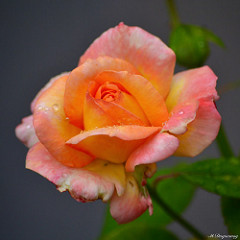

In [5]:
sample_roses = list(data_dir.glob("roses/*.jpg"))
PIL.Image.open(str(sample_roses[0]))

In [6]:
BATCH_SIZE = 32
IMAGE_HEIGHT = 320
IMAGE_WIDTH = 320

In [7]:
def image_ds_from_dir(soc_dir, val_size, subset, seed):
    ds = tf.keras.utils.image_dataset_from_directory(
        directory=soc_dir,
        validation_split=val_size,
        subset=subset,
        seed=seed,
        image_size=(IMAGE_HEIGHT, IMAGE_WIDTH),
        batch_size=BATCH_SIZE
    )
    return ds

def image_ds_split_from_dir(soc_dir, val_size, seed):
    train_ds = image_ds_from_dir(soc_dir, val_size, "training", seed)
    val_ds = image_ds_from_dir(soc_dir, val_size, "validation", seed)
    return train_ds, val_ds

In [9]:
train_ds, val_ds = image_ds_split_from_dir(data_dir, 0.2, 123)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.
Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [10]:
class_names = train_ds.class_names

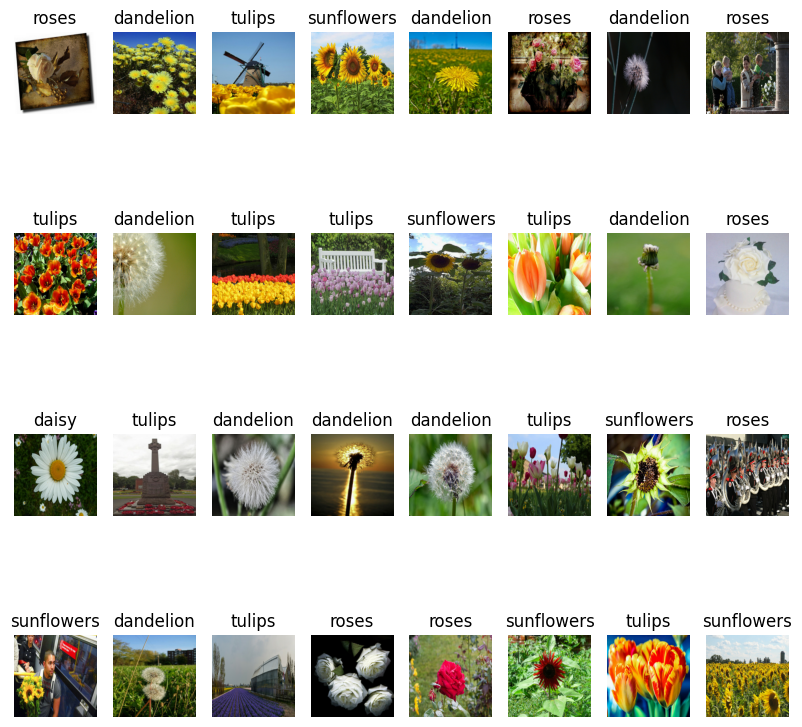

In [11]:
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(BATCH_SIZE):
        ax = plt.subplot(4,8,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [12]:
for images, labels in train_ds:
    print(
        f"features shape: {images.shape}\n"
        f"labels   shape: {labels.shape}"
    )
    break

features shape: (32, 320, 320, 3)
labels   shape: (32,)


In [13]:
np.max(train_ds)

<BatchDataset shapes: ((None, 320, 320, 3), (None,)), types: (tf.float32, tf.int32)>